In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
import root_pandas
import ROOT
import math
import glob

Welcome to JupyROOT 6.08/06


In [2]:
pion = root_pandas.read_root('prel03b_charged.root','pion')
kaon = root_pandas.read_root('prel03b_charged.root','kaon')
electron = root_pandas.read_root('prel03b_charged.root','electron')
muon = root_pandas.read_root('prel03b_charged.root','muon')
proton = root_pandas.read_root('prel03b_charged.root','proton')

Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


## Copy and paste these values into analysis/scripts/stdCharged.py

In [3]:
digits=4
[[round(np.percentile(pion[(abs(pion.mcPDG)==211)&(pion.p<4)&(pion.p>1)].pionID, 5),digits),
  round(np.percentile(pion[(abs(pion.mcPDG)==211)&(pion.p<4)&(pion.p>1)].pionID, 10),digits),
  round(np.percentile(pion[(abs(pion.mcPDG)==211)&(pion.p<4)&(pion.p>1)].pionID, 15),digits)],
 [round(np.percentile(kaon[(abs(kaon.mcPDG)==321)&(kaon.p<4)&(kaon.p>1)].kaonID, 5),digits),
  round(np.percentile(kaon[(abs(kaon.mcPDG)==321)&(kaon.p<4)&(kaon.p>1)].kaonID, 10),digits),
  round(np.percentile(kaon[(abs(kaon.mcPDG)==321)&(kaon.p<4)&(kaon.p>1)].kaonID, 15),digits)],
 [round(np.percentile(proton[(abs(proton.mcPDG)==2212)&(proton.p<4)&(proton.p>1)].protonID, 5),digits),
  round(np.percentile(proton[(abs(proton.mcPDG)==2212)&(proton.p<4)&(proton.p>1)].protonID, 10),digits),
  round(np.percentile(proton[(abs(proton.mcPDG)==2212)&(proton.p<4)&(proton.p>1)].protonID, 15),digits)],
 [round(np.percentile(electron[(abs(electron.mcPDG)==11)&(electron.p<4)&(electron.p>1)].electronID, 5),digits),
  round(np.percentile(electron[(abs(electron.mcPDG)==11)&(electron.p<4)&(electron.p>1)].electronID, 10),digits),
  round(np.percentile(electron[(abs(electron.mcPDG)==11)&(electron.p<4)&(electron.p>1)].electronID, 15),digits)],
 [round(np.percentile(muon[(abs(muon.mcPDG)==13)&(muon.p<4)&(muon.p>1)].muonID, 5),digits),
  round(np.percentile(muon[(abs(muon.mcPDG)==13)&(muon.p<4)&(muon.p>1)].muonID, 10),digits),
  round(np.percentile(muon[(abs(muon.mcPDG)==13)&(muon.p<4)&(muon.p>1)].muonID, 15),digits)],
]

[[0.0005, 0.019, 0.0978],
 [0.0001, 0.0268, 0.167],
 [0.0, 0.0433, 0.2511],
 [0.093, 0.3012, 0.7091],
 [0.1867, 0.4185, 0.9089]]

Note that if a working point is <0.0001, the output will be 0.0 (quite obviously) and stdCharged will not create such a list. If a specific list is used for skimming or physics validation, it may be wise to increase the value of **digits** or switch to a different list. Coordinate with validation liaisons to figure out the best approach.

## ROC Plots

In [4]:
dsets = [pion,kaon,electron,muon,proton]
setlabels = ["Pion","Kaon","Electron","Muon","Proton"]
colorset = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange', 'tab:purple']

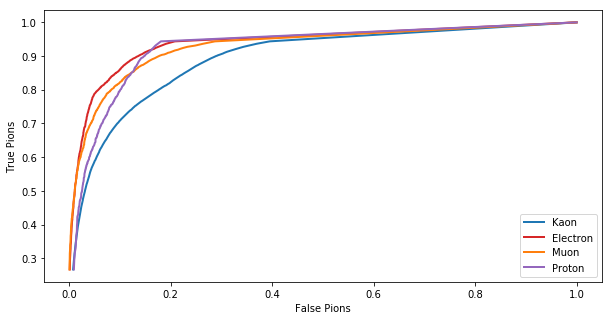

In [5]:
roc_bins=1000
pi = [0 for y in range(roc_bins)] 
ka = [0 for y in range(roc_bins)] 
pr = [0 for y in range(roc_bins)] 
el = [0 for y in range(roc_bins)] 
mu = [0 for y in range(roc_bins)] 
for i in range(roc_bins):
        pi[i]=pion[(pion.pionID>(i/roc_bins))&(abs(pion.mcPDG)==211)&(pion.p<4)&(pion.p>1)].mcPDG.count()/pion[(abs(pion.mcPDG)==211)&(pion.p<4)&(pion.p>1)].mcPDG.count()
        ka[i]=kaon[(kaon.pionID>(i/roc_bins))&(abs(kaon.mcPDG)==321)&(kaon.p<4)&(kaon.p>1)].mcPDG.count()/kaon[(abs(kaon.mcPDG)==321)&(kaon.p<4)&(kaon.p>1)].mcPDG.count()
        pr[i]=proton[(proton.pionID>(i/roc_bins))&(abs(proton.mcPDG)==2212)&(proton.p<4)&(proton.p>1)].mcPDG.count()/proton[(abs(proton.mcPDG)==2212)&(proton.p<4)&(proton.p>1)].mcPDG.count()
        el[i]=electron[(electron.pionID>(i/roc_bins))&(abs(electron.mcPDG)==11)&(electron.p<4)&(electron.p>1)].mcPDG.count()/electron[(abs(electron.mcPDG)==11)&(electron.p<4)&(electron.p>1)].mcPDG.count()
        mu[i]=muon[(muon.pionID>(i/roc_bins))&(abs(muon.mcPDG)==13)&(muon.p<4)&(muon.p>1)].mcPDG.count()/muon[(abs(muon.mcPDG)==13)&(muon.p<4)&(muon.p>1)].mcPDG.count()
plt.figure(figsize=(10,5))
plt.plot(ka, pi, color=colorset[1], lw=2, label=setlabels[1])
plt.plot(pr, pi, color=colorset[2], lw=2, label=setlabels[2])
plt.plot(el, pi, color=colorset[3], lw=2, label=setlabels[3])
plt.plot(mu, pi, color=colorset[4], lw=2, label=setlabels[4])
plt.xlabel('False Pions')
plt.ylabel('True Pions')
plt.legend(loc=4)

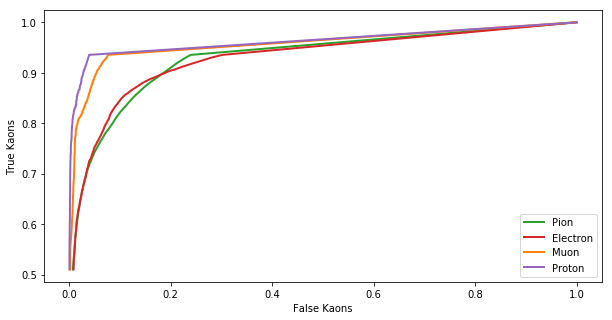

In [6]:
roc_bins=1000
pi = [0 for y in range(roc_bins)] 
ka = [0 for y in range(roc_bins)] 
pr = [0 for y in range(roc_bins)] 
el = [0 for y in range(roc_bins)] 
mu = [0 for y in range(roc_bins)] 
for i in range(roc_bins):
        pi[i]=pion[(pion.kaonID>(i/roc_bins))&(abs(pion.mcPDG)==211)&(pion.p<4)&(pion.p>1)].mcPDG.count()/pion[(abs(pion.mcPDG)==211)&(pion.p<4)&(pion.p>1)].mcPDG.count()
        ka[i]=kaon[(kaon.kaonID>(i/roc_bins))&(abs(kaon.mcPDG)==321)&(kaon.p<4)&(kaon.p>1)].mcPDG.count()/kaon[(abs(kaon.mcPDG)==321)&(kaon.p<4)&(kaon.p>1)].mcPDG.count()
        pr[i]=proton[(proton.kaonID>(i/roc_bins))&(abs(proton.mcPDG)==2212)&(proton.p<4)&(proton.p>1)].mcPDG.count()/proton[(abs(proton.mcPDG)==2212)&(proton.p<4)&(proton.p>1)].mcPDG.count()
        el[i]=electron[(electron.kaonID>(i/roc_bins))&(abs(electron.mcPDG)==11)&(electron.p<4)&(electron.p>1)].mcPDG.count()/electron[(abs(electron.mcPDG)==11)&(electron.p<4)&(electron.p>1)].mcPDG.count()
        mu[i]=muon[(muon.kaonID>(i/roc_bins))&(abs(muon.mcPDG)==13)&(muon.p<4)&(muon.p>1)].mcPDG.count()/muon[(abs(muon.mcPDG)==13)&(muon.p<4)&(muon.p>1)].mcPDG.count()
plt.figure(figsize=(10,5))
plt.plot(pi, ka, color=colorset[0], lw=2, label=setlabels[0])
plt.plot(pr, ka, color=colorset[2], lw=2, label=setlabels[2])
plt.plot(el, ka, color=colorset[3], lw=2, label=setlabels[3])
plt.plot(mu, ka, color=colorset[4], lw=2, label=setlabels[4])
plt.xlabel('False Kaons')
plt.ylabel('True Kaons')
plt.legend(loc=4)

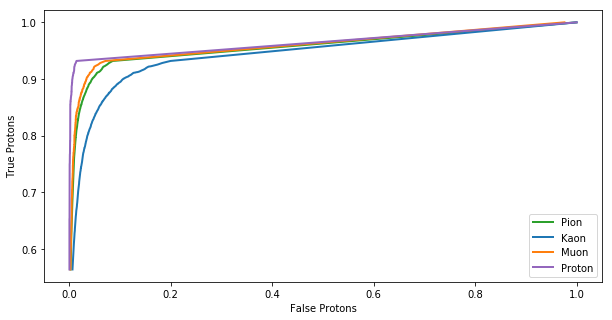

In [7]:
roc_bins=1000
pi = [0 for y in range(roc_bins)] 
ka = [0 for y in range(roc_bins)] 
pr = [0 for y in range(roc_bins)] 
el = [0 for y in range(roc_bins)] 
mu = [0 for y in range(roc_bins)] 
for i in range(roc_bins):
        pi[i]=pion[(pion.protonID>(i/roc_bins))&(abs(pion.mcPDG)==211)&(pion.p<4)&(pion.p>1)].mcPDG.count()/pion[(abs(pion.mcPDG)==211)&(pion.p<4)&(pion.p>1)].mcPDG.count()
        ka[i]=kaon[(kaon.protonID>(i/roc_bins))&(abs(kaon.mcPDG)==321)&(kaon.p<4)&(kaon.p>1)].mcPDG.count()/kaon[(abs(kaon.mcPDG)==321)&(kaon.p<4)&(kaon.p>1)].mcPDG.count()
        pr[i]=proton[(proton.protonID>(i/roc_bins))&(abs(proton.mcPDG)==2212)&(proton.p<4)&(proton.p>1)].mcPDG.count()/proton[(abs(proton.mcPDG)==2212)&(proton.p<4)&(proton.p>1)].mcPDG.count()
        el[i]=electron[(electron.protonID>(i/roc_bins))&(abs(electron.mcPDG)==11)&(electron.p<4)&(electron.p>1)].mcPDG.count()/electron[(abs(electron.mcPDG)==11)&(electron.p<4)&(electron.p>1)].mcPDG.count()
        mu[i]=muon[(muon.protonID>(i/roc_bins))&(abs(muon.mcPDG)==13)&(muon.p<4)&(muon.p>1)].mcPDG.count()/muon[(abs(muon.mcPDG)==13)&(muon.p<4)&(muon.p>1)].mcPDG.count()
plt.figure(figsize=(10,5))
plt.plot(pi, pr, color=colorset[0], lw=2, label=setlabels[0])
plt.plot(ka, pr, color=colorset[1], lw=2, label=setlabels[1])
plt.plot(el, pr, color=colorset[3], lw=2, label=setlabels[3])
plt.plot(mu, pr, color=colorset[4], lw=2, label=setlabels[4])
plt.xlabel('False Protons')
plt.ylabel('True Protons')
plt.legend(loc=4)

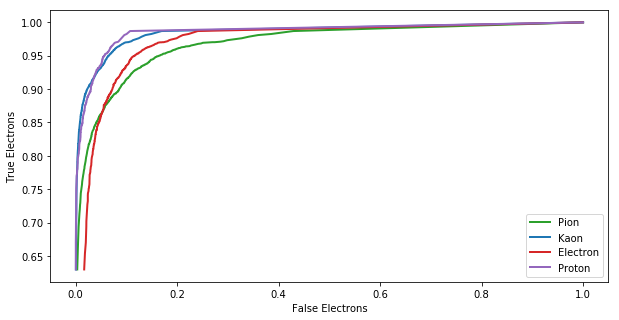

In [8]:
roc_bins=1000
pi = [0 for y in range(roc_bins)] 
ka = [0 for y in range(roc_bins)] 
pr = [0 for y in range(roc_bins)] 
el = [0 for y in range(roc_bins)] 
mu = [0 for y in range(roc_bins)] 
for i in range(roc_bins):
        pi[i]=pion[(pion.electronID>(i/roc_bins))&(abs(pion.mcPDG)==211)&(pion.p<4)&(pion.p>1)].mcPDG.count()/pion[(abs(pion.mcPDG)==211)&(pion.p<4)&(pion.p>1)].mcPDG.count()
        ka[i]=kaon[(kaon.electronID>(i/roc_bins))&(abs(kaon.mcPDG)==321)&(kaon.p<4)&(kaon.p>1)].mcPDG.count()/kaon[(abs(kaon.mcPDG)==321)&(kaon.p<4)&(kaon.p>1)].mcPDG.count()
        pr[i]=proton[(proton.electronID>(i/roc_bins))&(abs(proton.mcPDG)==2212)&(proton.p<4)&(proton.p>1)].mcPDG.count()/proton[(abs(proton.mcPDG)==2212)&(proton.p<4)&(proton.p>1)].mcPDG.count()
        el[i]=electron[(electron.electronID>(i/roc_bins))&(abs(electron.mcPDG)==11)&(electron.p<4)&(electron.p>1)].mcPDG.count()/electron[(abs(electron.mcPDG)==11)&(electron.p<4)&(electron.p>1)].mcPDG.count()
        mu[i]=muon[(muon.electronID>(i/roc_bins))&(abs(muon.mcPDG)==13)&(muon.p<4)&(muon.p>1)].mcPDG.count()/muon[(abs(muon.mcPDG)==13)&(muon.p<4)&(muon.p>1)].mcPDG.count()
plt.figure(figsize=(10,5))
plt.plot(pi, el, color=colorset[0], lw=2, label=setlabels[0])
plt.plot(ka, el, color=colorset[1], lw=2, label=setlabels[1])
plt.plot(pr, el, color=colorset[2], lw=2, label=setlabels[2])
plt.plot(mu, el, color=colorset[4], lw=2, label=setlabels[4])
plt.xlabel('False Electrons')
plt.ylabel('True Electrons')
plt.legend(loc=4)

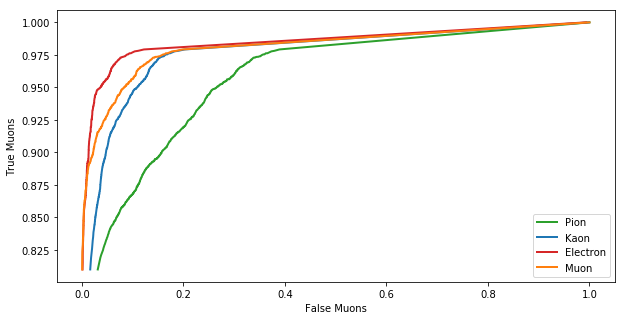

In [9]:
roc_bins=1000
pi = [0 for y in range(roc_bins)] 
ka = [0 for y in range(roc_bins)] 
pr = [0 for y in range(roc_bins)] 
el = [0 for y in range(roc_bins)] 
mu = [0 for y in range(roc_bins)] 
for i in range(roc_bins):
        pi[i]=pion[(pion.muonID>(i/roc_bins))&(abs(pion.mcPDG)==211)&(pion.p<4)&(pion.p>1)].mcPDG.count()/pion[(abs(pion.mcPDG)==211)&(pion.p<4)&(pion.p>1)].mcPDG.count()
        ka[i]=kaon[(kaon.muonID>(i/roc_bins))&(abs(kaon.mcPDG)==321)&(kaon.p<4)&(kaon.p>1)].mcPDG.count()/kaon[(abs(kaon.mcPDG)==321)&(kaon.p<4)&(kaon.p>1)].mcPDG.count()
        pr[i]=proton[(proton.muonID>(i/roc_bins))&(abs(proton.mcPDG)==2212)&(proton.p<4)&(proton.p>1)].mcPDG.count()/proton[(abs(proton.mcPDG)==2212)&(proton.p<4)&(proton.p>1)].mcPDG.count()
        el[i]=electron[(electron.muonID>(i/roc_bins))&(abs(electron.mcPDG)==11)&(electron.p<4)&(electron.p>1)].mcPDG.count()/electron[(abs(electron.mcPDG)==11)&(electron.p<4)&(electron.p>1)].mcPDG.count()
        mu[i]=muon[(muon.muonID>(i/roc_bins))&(abs(muon.mcPDG)==13)&(muon.p<4)&(muon.p>1)].mcPDG.count()/muon[(abs(muon.mcPDG)==13)&(muon.p<4)&(muon.p>1)].mcPDG.count()
plt.figure(figsize=(10,5))
plt.plot(pi, mu, color=colorset[0], lw=2, label=setlabels[0])
plt.plot(ka, mu, color=colorset[1], lw=2, label=setlabels[1])
plt.plot(pr, mu, color=colorset[2], lw=2, label=setlabels[2])
plt.plot(el, mu, color=colorset[3], lw=2, label=setlabels[3])
plt.xlabel('False Muons')
plt.ylabel('True Muons')
plt.legend(loc=4)

## [Expert] Plot all variables for monitoring

In [10]:
plt.rcParams.update({'figure.max_open_warning': 0})
def plotMonitor(percentileOverride = False, isNormed=True, bins=50):

    for var in pion.columns:
        if "mcPDG" in var:
            continue
        minrange = 1000000        
        maxrange = -1000000
        for i in range(len(dsets)):
            maxrange = max(dsets[i][var].max(),maxrange)
            minrange = min(dsets[i][var].min(),minrange)
        minrange = max(minrange,-10)
        maxrange = min(maxrange,10)
        plotrange=[minrange,maxrange]
    
        if percentileOverride:
            plotrange=(np.percentile(b2uc[var],[1.,99.]))
    
        plt.figure(figsize=(10,5))

        for i in range(len(dsets)):
            plt.hist(dsets[i][var], 
                     bins=bins, 
                     range=plotrange, 
                     histtype='step', 
                     color=colorset[i],
                     lw=2,
                     normed=isNormed,
                     label=setlabels[i]
                    )
        plt.legend(loc=1)
        plt.xlabel(var, fontsize=18)

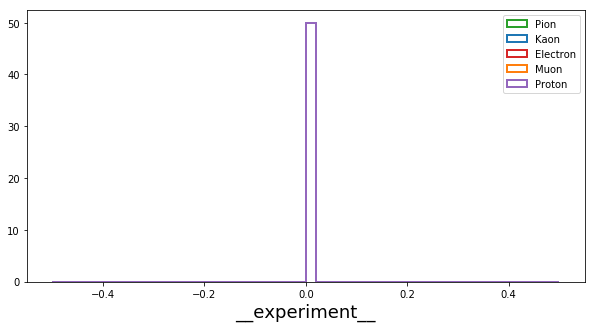

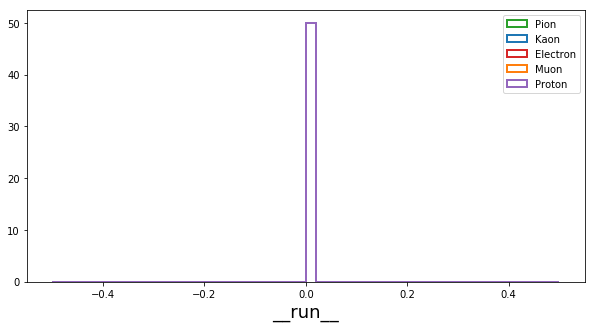

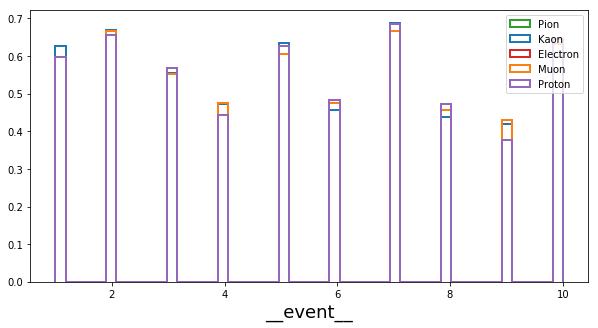

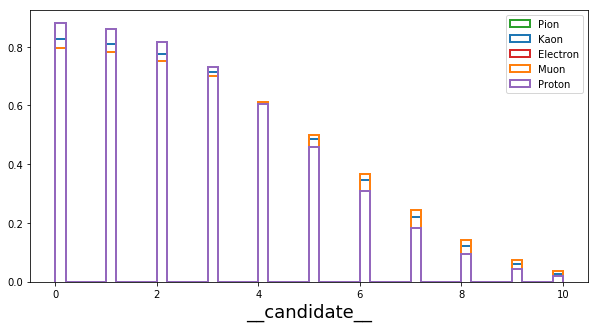

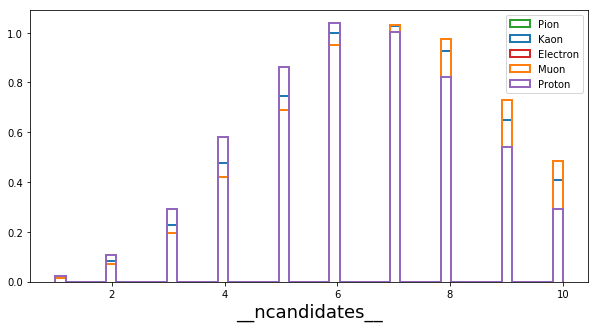

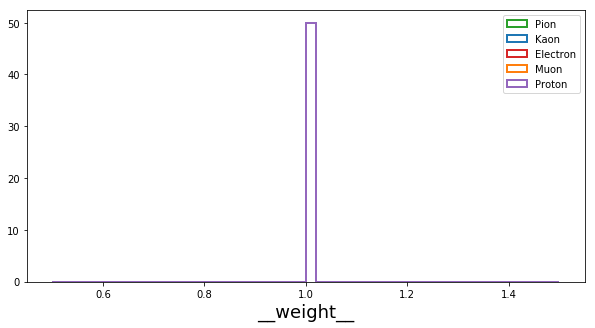

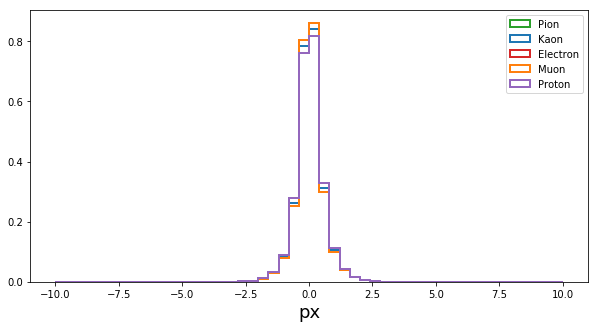

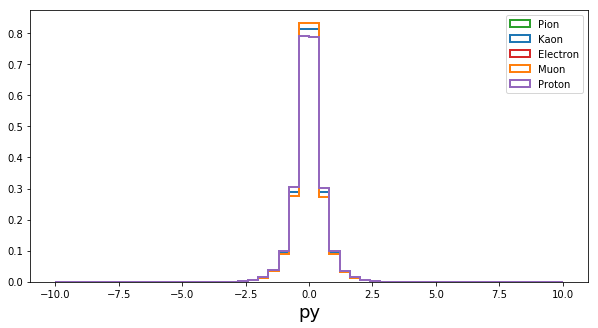

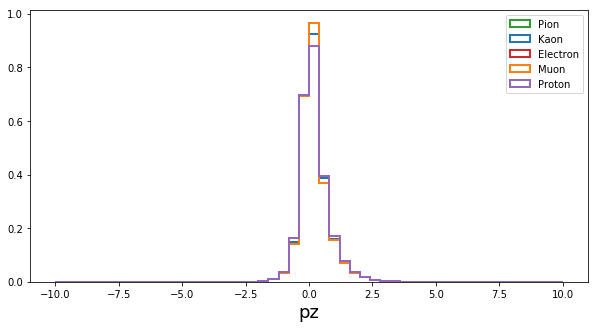

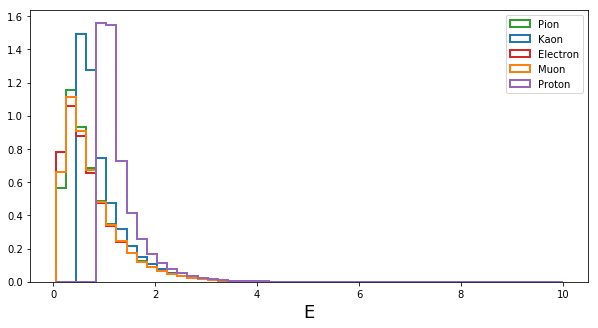

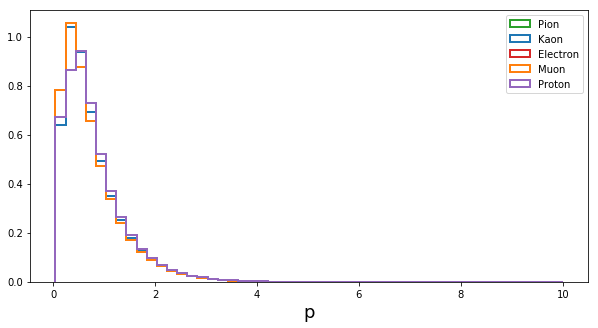

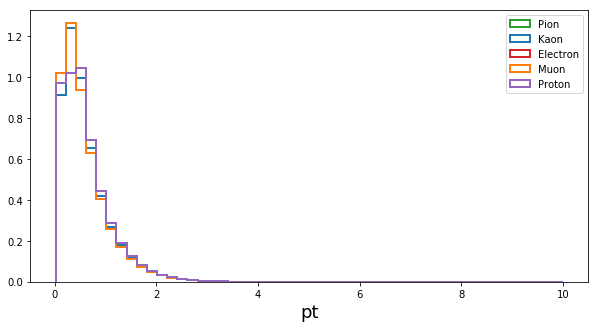

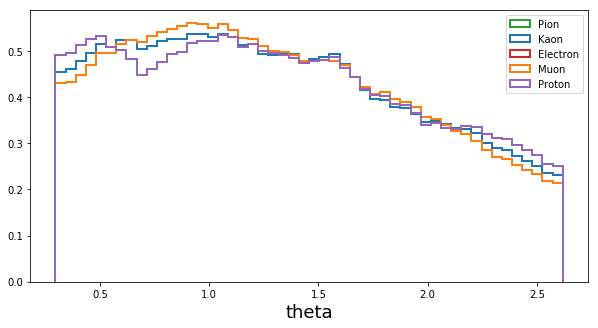

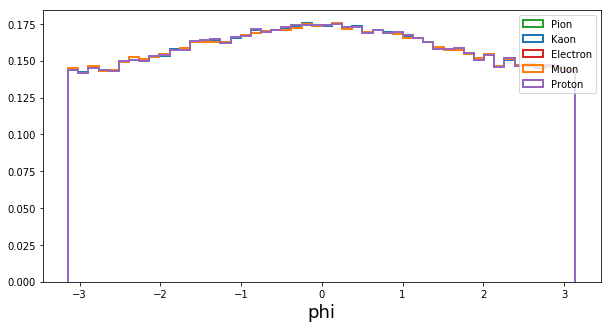

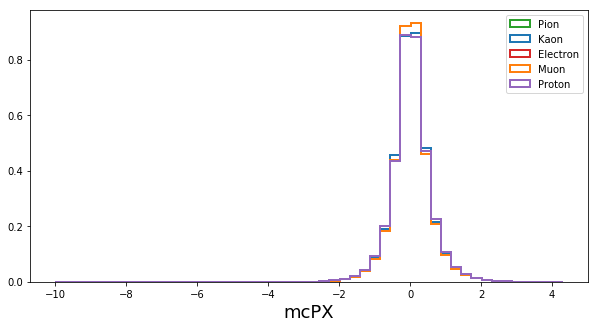

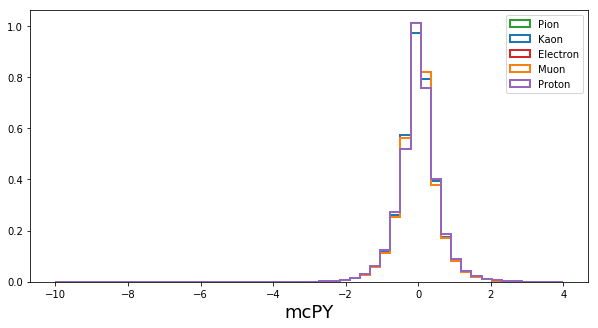

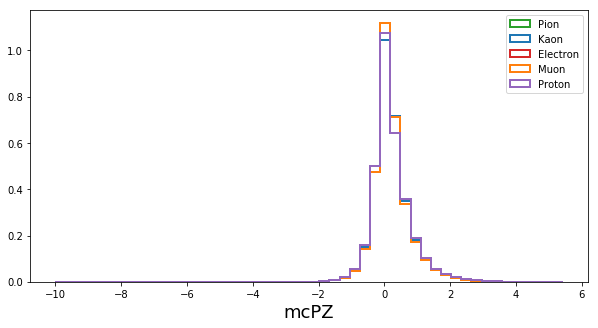

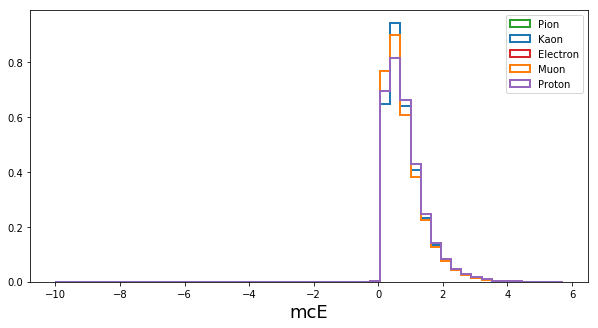

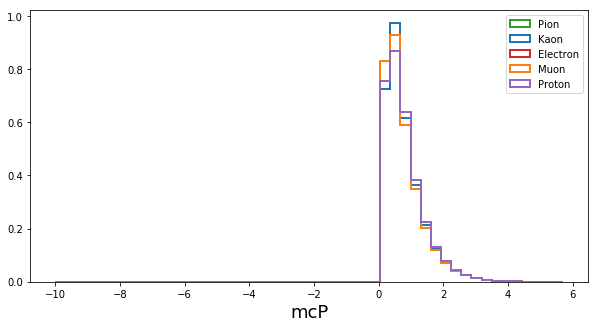

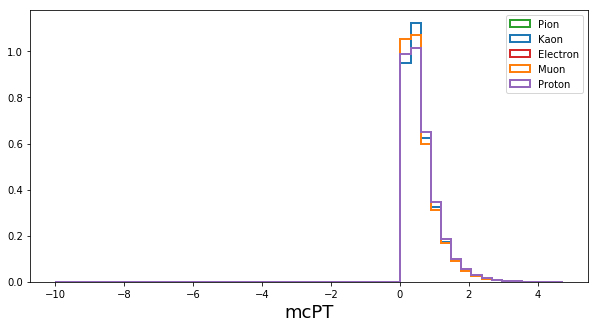

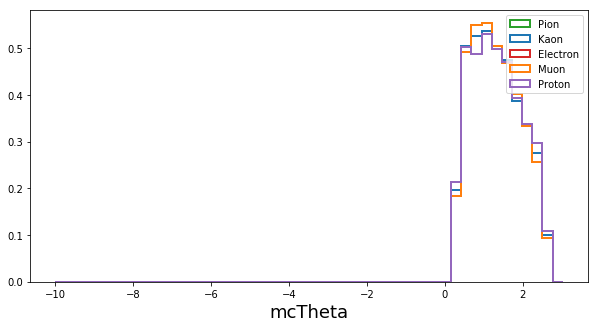

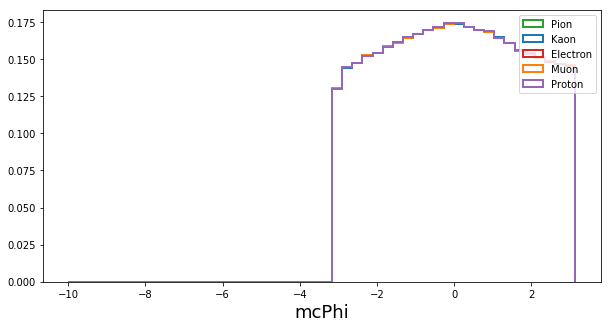

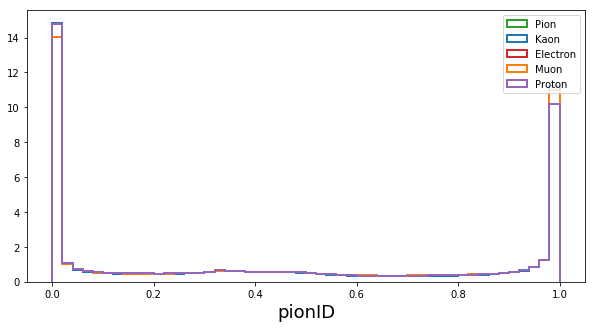

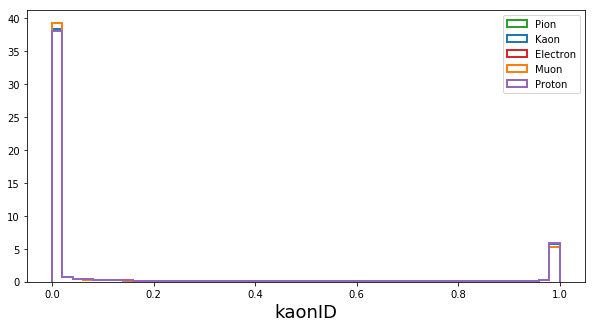

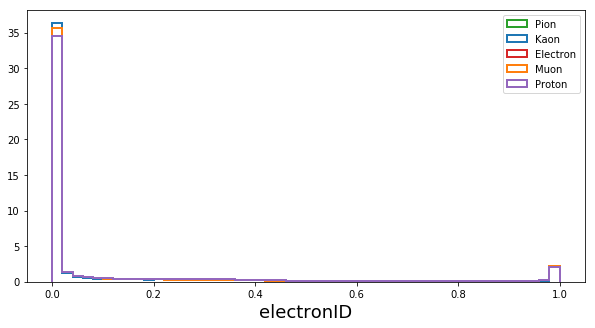

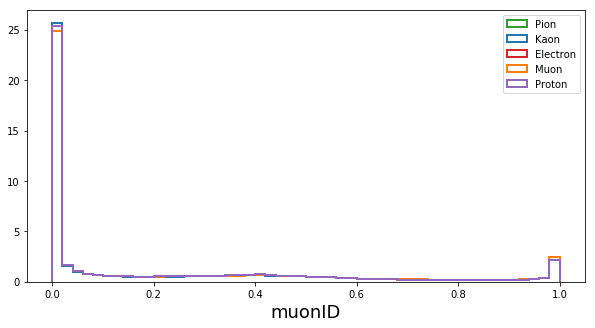

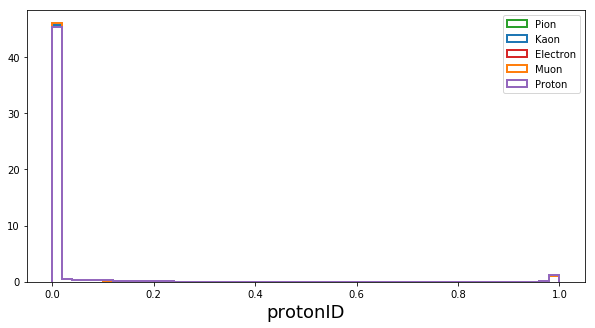

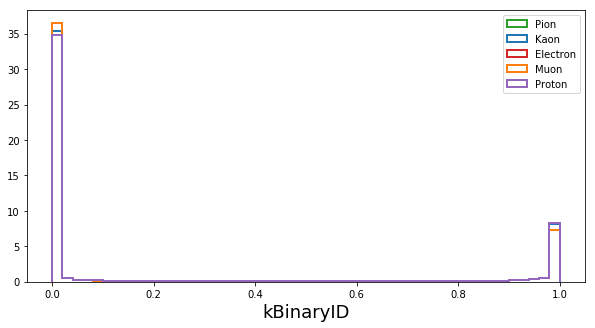

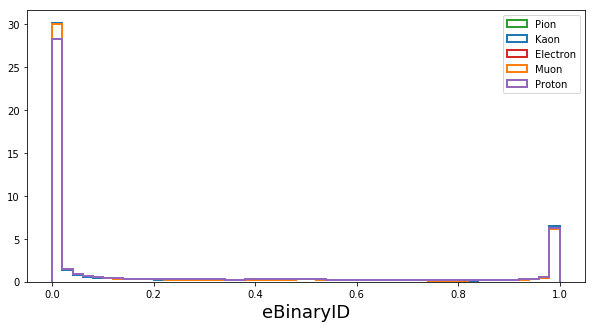

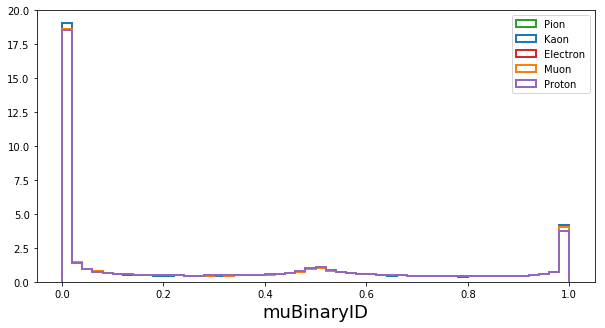

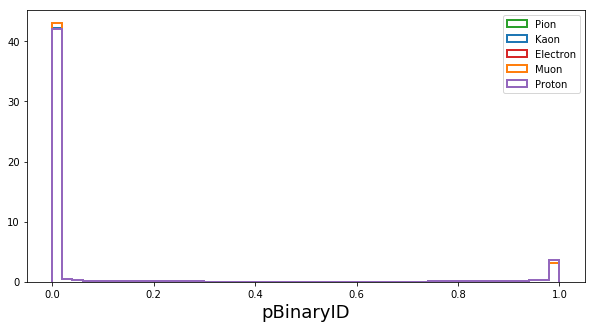

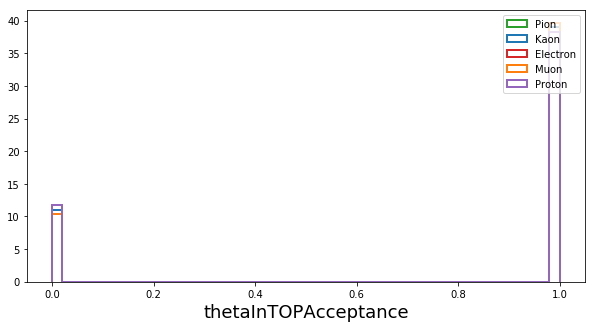

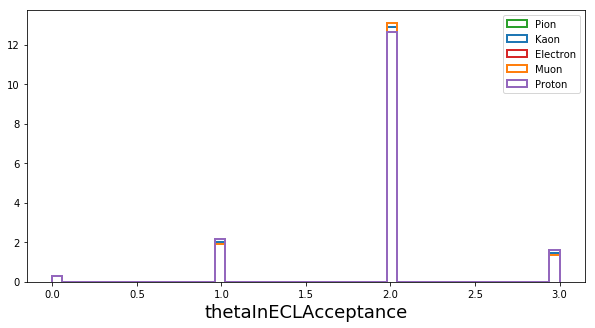

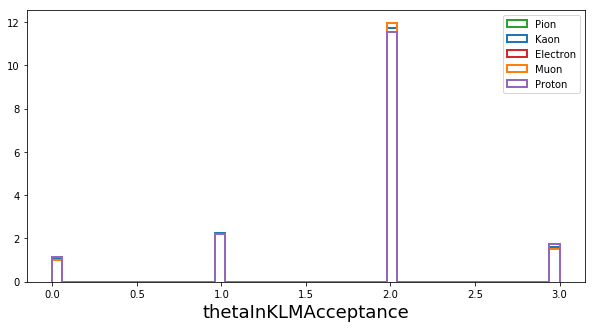

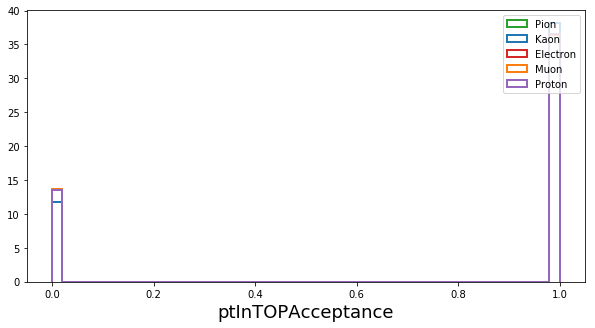

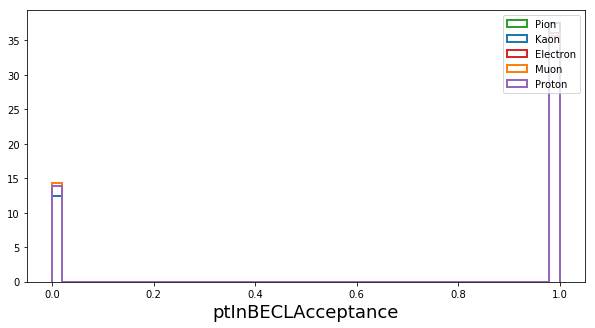

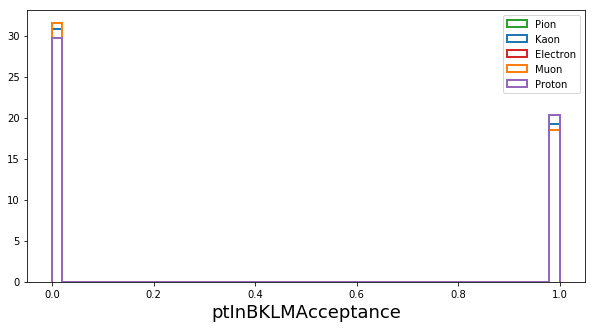

In [11]:
plotMonitor(percentileOverride=False,isNormed=True)